# Systematic study of recall time
In this notebook I study recall time systematicall with the both the artificial matrix and the normal training. We in particular calculate first for the **artificial matrix**:
* value
* inhibition
* number of patterns
* minicolumns
* hypercolumns
* tau_z
* tau_a
* g_a
* sequence decay
* extension
* extension decay
* gains for w 

For the **normal training protocol** we calculate all of the above and further:
* training time
* epochs
* inter sequence time
* tau_p

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '61b730afc40a2a0933454b69ac8ca67b63ba95e7'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from connectivity_functions import create_artificial_manager
from analysis_functions import calculate_timings, calculate_recall_success

I need to use a function to check that a partially recovered subsequence still agrees with the bigger sequence. For that, it is necessary that the subsequence is equal to sequence up to the length of the sub-sequence

In [4]:
def subsequence(sub, sequence):
    flag = True
    n_sub =len(sub)
    n_sequence = len(sequence)
    index = 0
    while index < n_sub and index < n_sequence:
        if sub[index] != sequence[index]:
            flag = False
            break
        index += 1

    return flag

## Artificial matrix

# A simple example

In [5]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

In [6]:
sequences = [[i for i in range(n_patterns)]]

manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                    extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                    dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)

manager.nn.tau_z_pre = tau_z_pre
manager.nn.g_w = g_w
manager.nn.g_w_ampa = g_w_ampa
manager.nn.g_a = g_a


T_cue = 0.100
T_recall = 10.0
I_cue = sequences[0][0]

In [7]:
success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
timings = calculate_timings(manager, remove=0.010)

In [8]:
time = [timings[index][1] for index in sequences[0]]
total_sequence_time = sum(time)
mean = np.mean(time[1:-1])
std = np.std(time[1:-1])

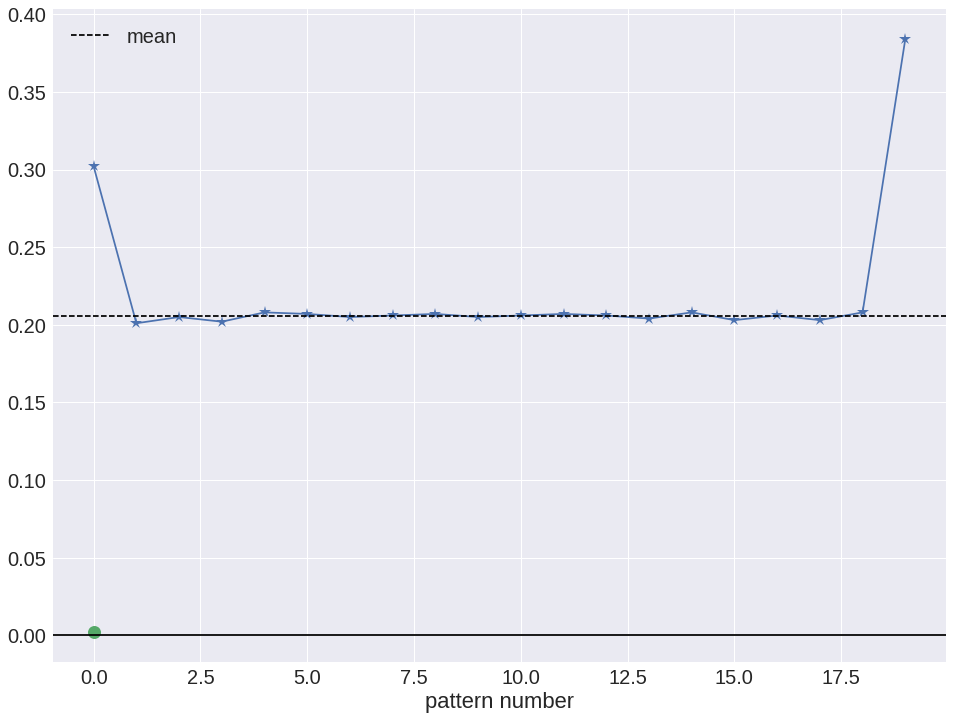

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(time, '*-', markersize=13)
ax.plot(std, 'o-', markersize=13)
ax.axhline(0, color='black')
ax.axhline(mean, ls='--', color='black', label='mean')

ax.set_xlabel('pattern number')
ax.legend();

#### Intensity

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

value_range = np.logspace(-2, 2, 10)

In [12]:
mean_intensity = []
std_intensity = []
total_intensity = []
successes = []

for value in value_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
    patterns = [x[0] for x in timings]
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])4
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_intensity.append(mean)
    std_intensity.append(std)
    total_intensity.append(total_sequence_time)
    successes.append(success)

/home/heberto/miniconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/heberto/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/heberto/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/heberto/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/heberto/miniconda/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


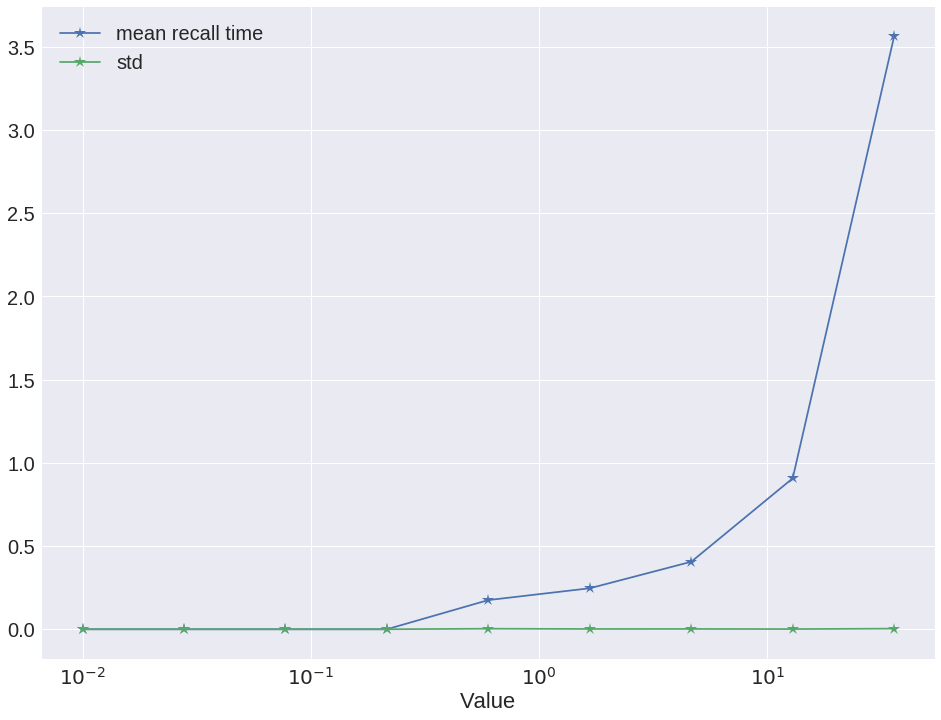

In [14]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_range, mean_intensity, '*-', markersize=13, label='mean recall time')
ax.plot(value_range, std_intensity, '*-', markersize=13, label='std')

ax.set_xlabel('Value')
ax.set_xscale('log')
ax.legend();

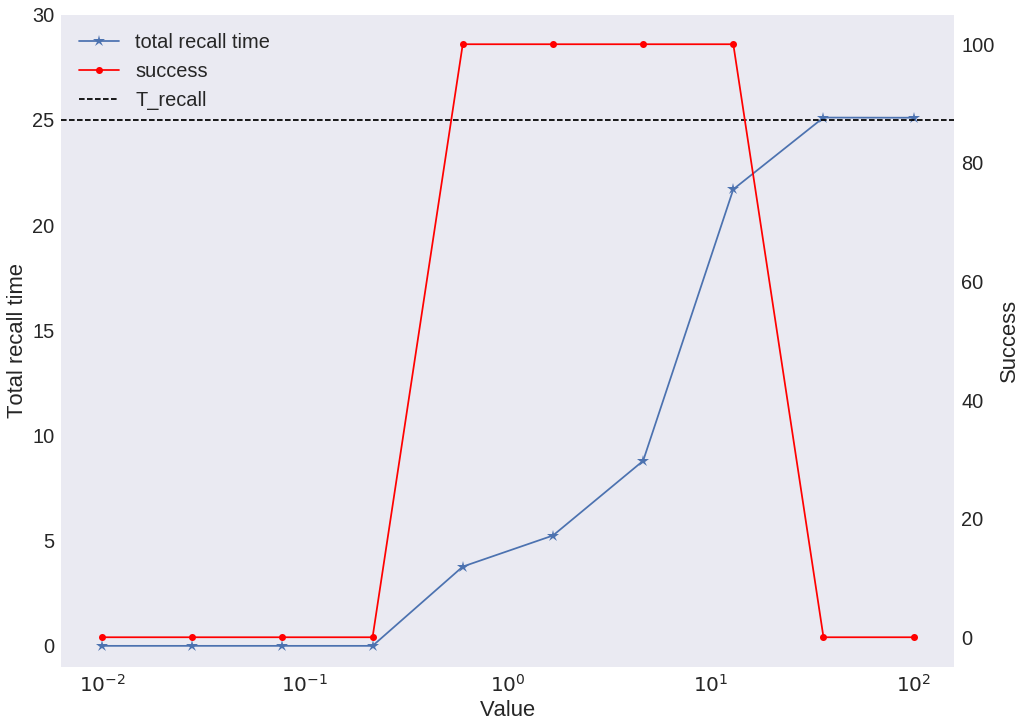

In [16]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(value_range, total_intensity, '*-', markersize=13, label='total recall time')
ax.set_xscale('log')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.set_xlabel('Value')
ax.set_ylabel('Total recall time')
ax.grid()


axt = ax.twinx()
lns2 = axt.plot(value_range, successes, 'o-', color='red', label='success')
axt.set_xscale('log')
axt.set_ylim([-5, 105])
axt.grid()

axt.set_ylabel('Success')

lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Inhibition

In [26]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

inhibition_range = np.logspace(-2, 2, 10)

In [27]:
mean_inhibition = []
std_inhibition = []
total_inhibition = []
successes_inhibition = []

for inhibition in inhibition_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=-inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_inhibition.append(mean)
    std_inhibition.append(std)
    total_inhibition.append(total_sequence_time)
    successes_inhibition.append(success)

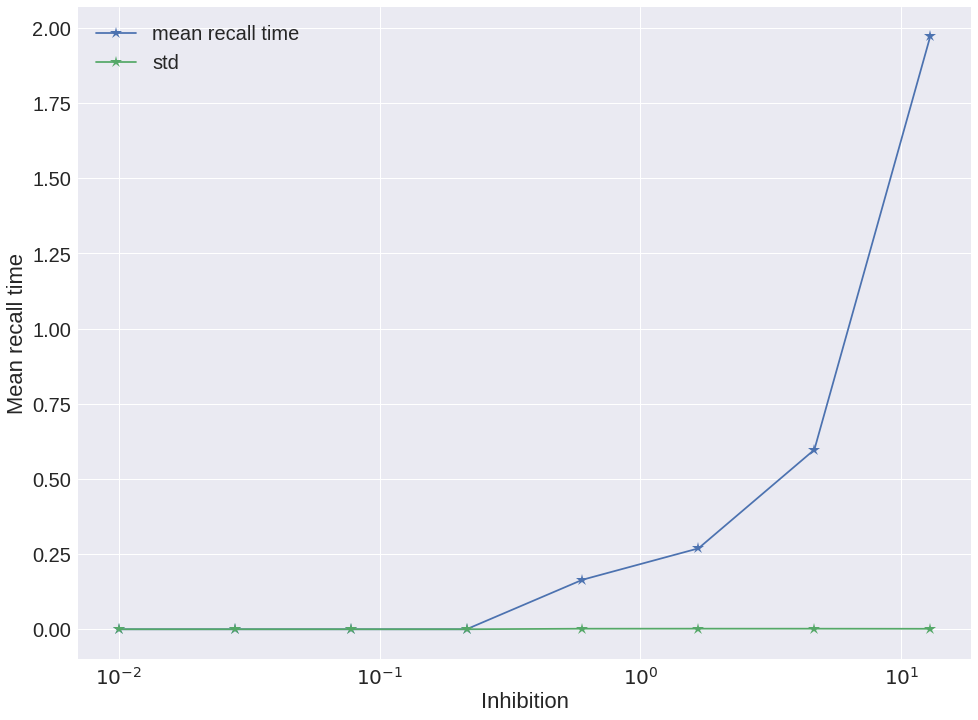

In [28]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(inhibition_range, mean_inhibition, '*-', markersize=13, label='mean recall time')
ax.plot(inhibition_range, std_inhibition, '*-', markersize=13, label='std')

ax.set_xlabel('Inhibition')
ax.set_ylabel('Mean recall time')

ax.set_xscale('log')
ax.legend();

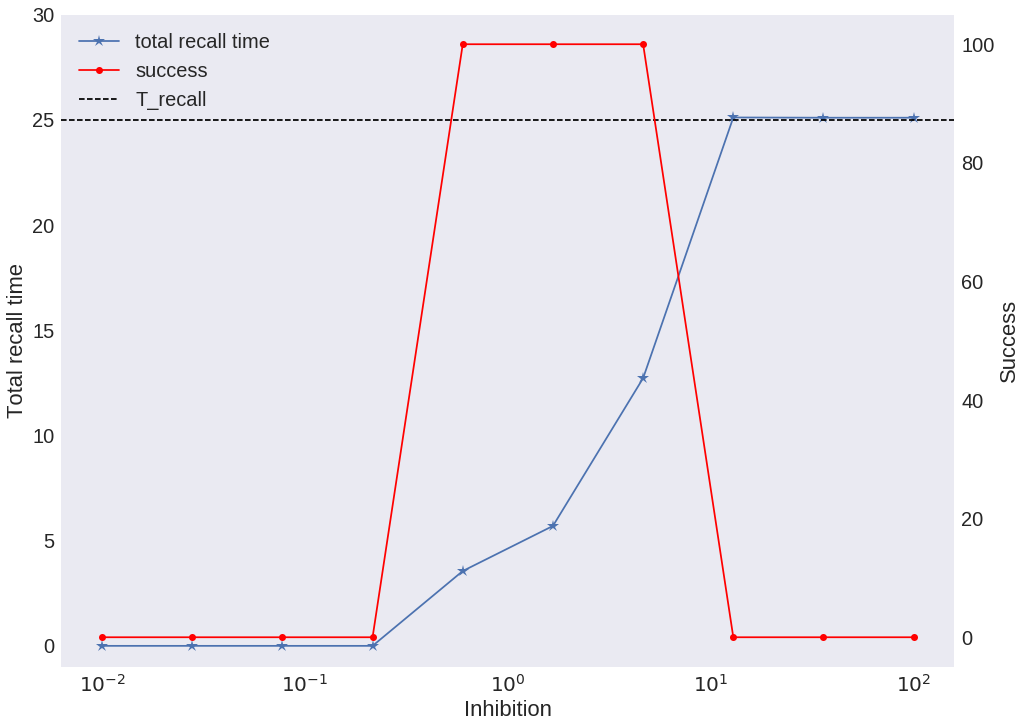

In [29]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(inhibition_range, total_inhibition, '*-', markersize=13, label='total recall time')
ax.set_xscale('log')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('Inhibition')
ax.set_ylabel('Total recall time')

axt = ax.twinx()
lns2 = axt.plot(inhibition_range, successes_inhibition, 'o-', color='red', label='success')
axt.set_xscale('log')
axt.set_ylim([-5, 105])
axt.grid()

axt.set_ylabel('Success')

lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Number of patterns

In [30]:
# Patterns parameters
hypercolumns = 4
minicolumns = 100
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0

n_patterns_range = np.arange(10, 100, 10)

In [31]:
mean_n_patterns = []
std_n_patterns = []
total_n_patterns = []
successes_n_patterns = []

for n_patterns in n_patterns_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_n_patterns.append(mean)
    std_n_patterns.append(std)
    total_n_patterns.append(total_sequence_time)
    successes_n_patterns.append(success)

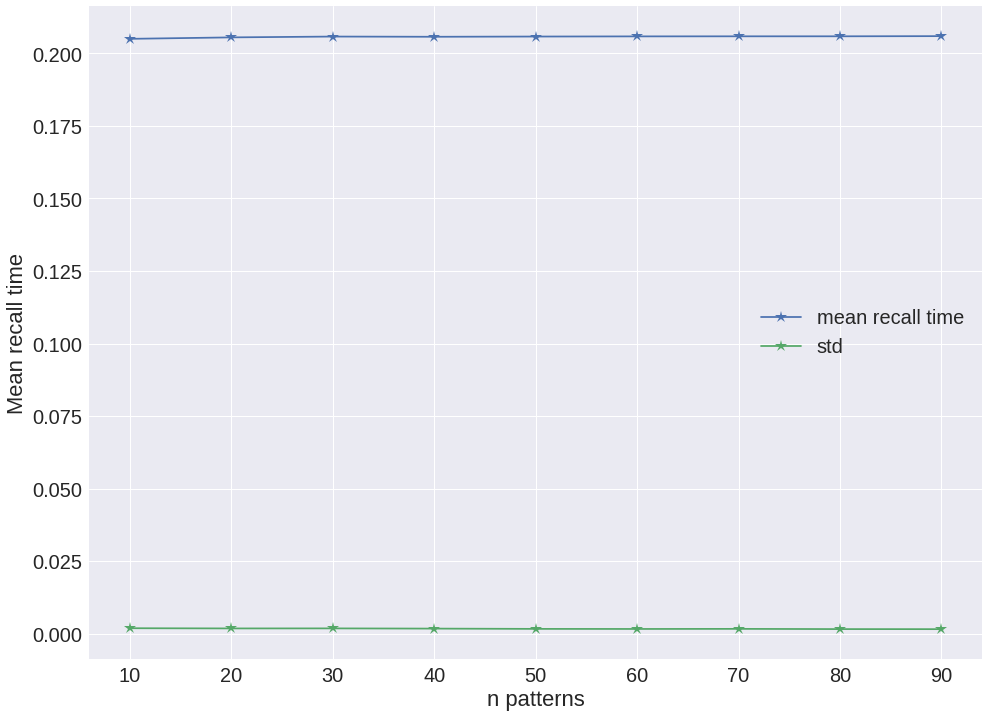

In [32]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(n_patterns_range, mean_n_patterns, '*-', markersize=13, label='mean recall time')
ax.plot(n_patterns_range, std_n_patterns, '*-', markersize=13, label='std')

ax.set_xlabel('n patterns')
ax.set_ylabel('Mean recall time')

ax.legend();

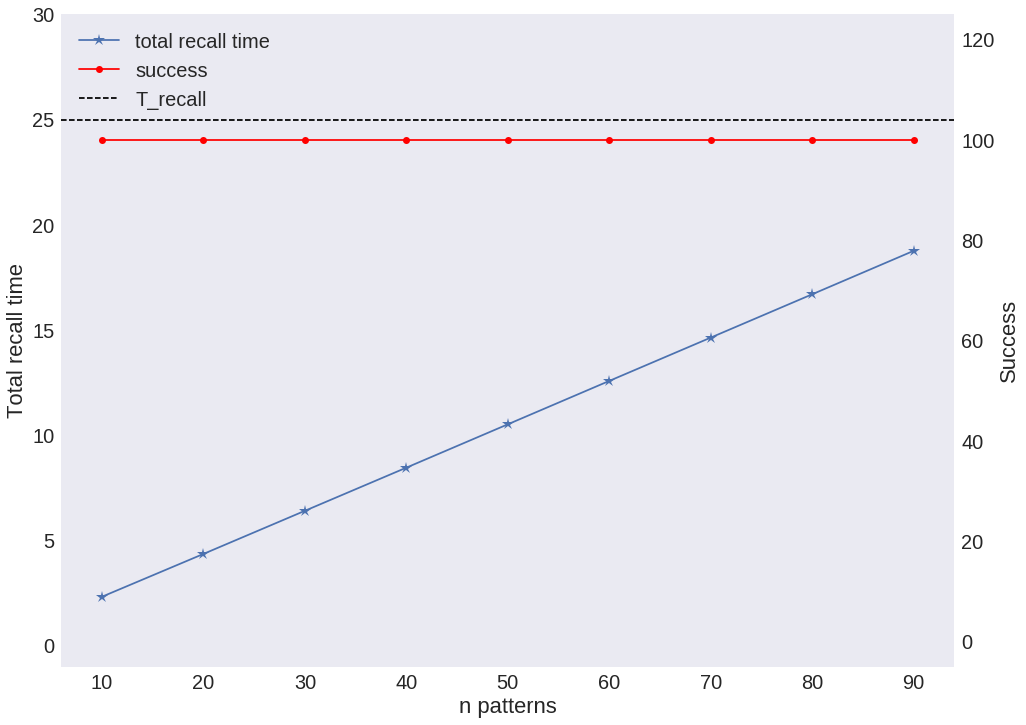

In [33]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(n_patterns_range, total_n_patterns, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('n patterns')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(n_patterns_range, successes_n_patterns, 'o-', color='red', label='success')
axt.set_ylim([-5, 125])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Minicolumns

In [34]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

minicolumns_range = np.arange(20, 100, 10)

In [35]:
mean_minicolumns = []
std_minicolumns = []
total_minicolumns = []
successes_minicolumns = []

for minicolumns in minicolumns_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_minicolumns.append(mean)
    std_minicolumns.append(std)
    total_minicolumns.append(total_sequence_time)
    successes_minicolumns.append(success)

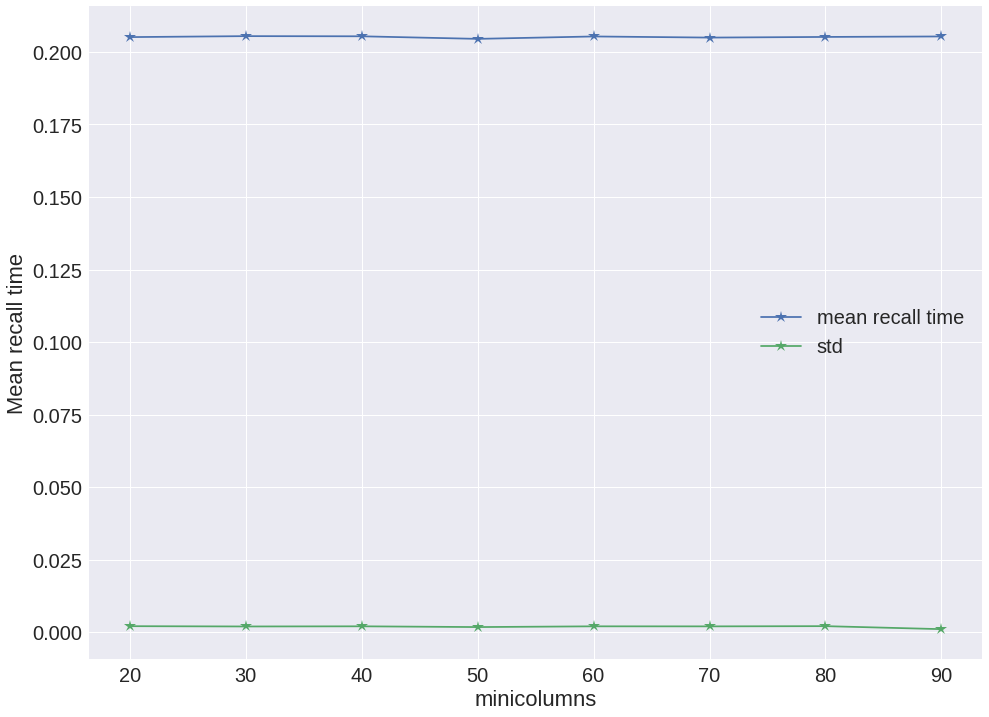

In [36]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(minicolumns_range, mean_minicolumns, '*-', markersize=13, label='mean recall time')
ax.plot(minicolumns_range, std_minicolumns, '*-', markersize=13, label='std')

ax.set_xlabel('minicolumns')
ax.set_ylabel('Mean recall time')

ax.legend();

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(minicolumns_range, total_minicolumns, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('minicolumns')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(minicolumns_range, successes_minicolumns, 'o-', color='red', label='success')
axt.set_ylim([-5, 125])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### hypercolumns

In [38]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

hypercolumns_range = np.arange(2, 12, 2)

In [39]:
mean_hypercolumns = []
std_hypercolumns = []
total_hypercolumns = []
successes_hypercolumns = []

for hypercolumns in hypercolumns_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_hypercolumns.append(mean)
    std_hypercolumns.append(std)
    total_hypercolumns.append(total_sequence_time)
    successes_hypercolumns.append(success)

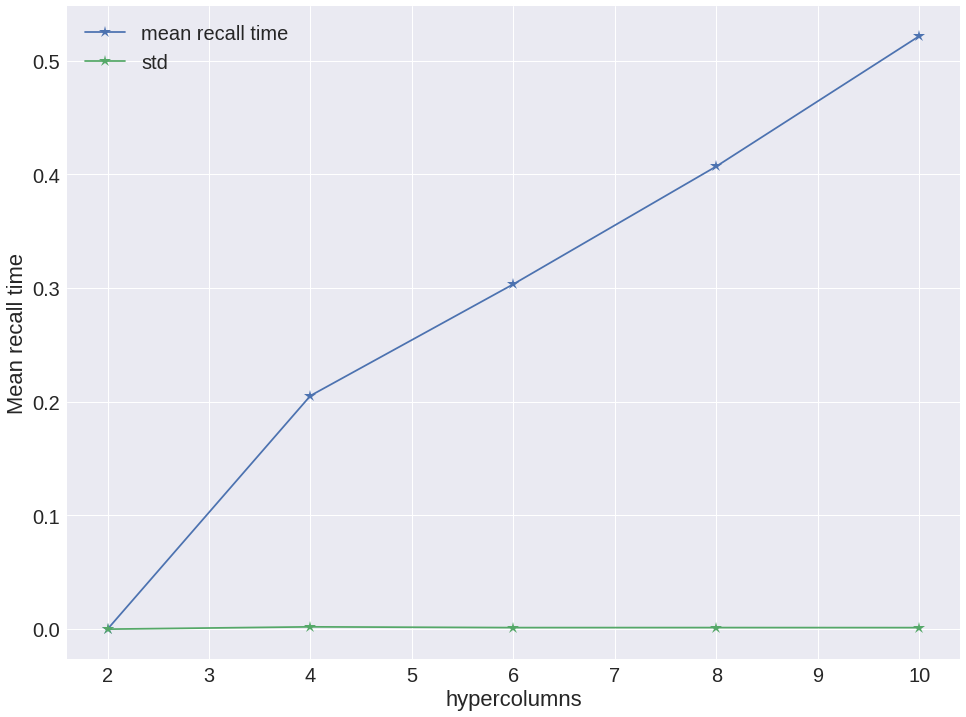

In [40]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(hypercolumns_range, mean_hypercolumns, '*-', markersize=13, label='mean recall time')
ax.plot(hypercolumns_range, std_hypercolumns, '*-', markersize=13, label='std')

ax.set_xlabel('hypercolumns')
ax.set_ylabel('Mean recall time')

ax.legend();

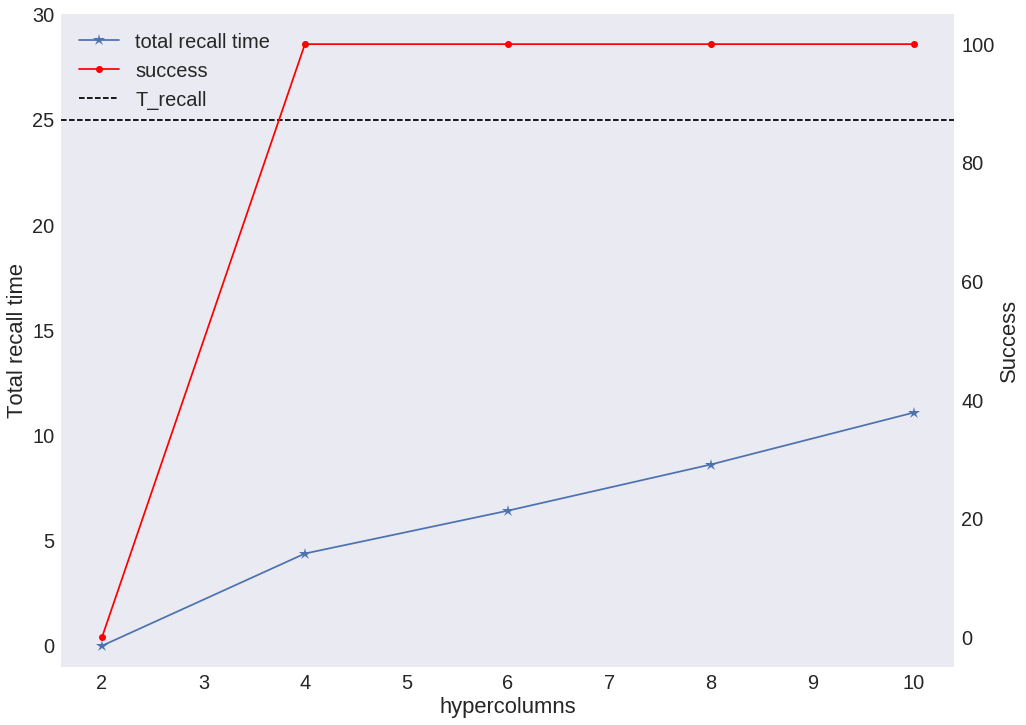

In [41]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(hypercolumns_range, total_hypercolumns, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('hypercolumns')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(hypercolumns_range, successes_hypercolumns, 'o-', color='red', label='success')
axt.set_ylim([-5, 115])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Tau_z

In [42]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

tau_z_pre_range = np.arange(0.050, 1.050, 0.050)

In [44]:
mean_tau_z_pre = []
std_tau_z_pre = []
total_tau_z_pre = []
successes_tau_z_pre = []

for tau_z_pre in tau_z_pre_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_tau_z_pre.append(mean)
    std_tau_z_pre.append(std)
    total_tau_z_pre.append(total_sequence_time)
    successes_tau_z_pre.append(success)

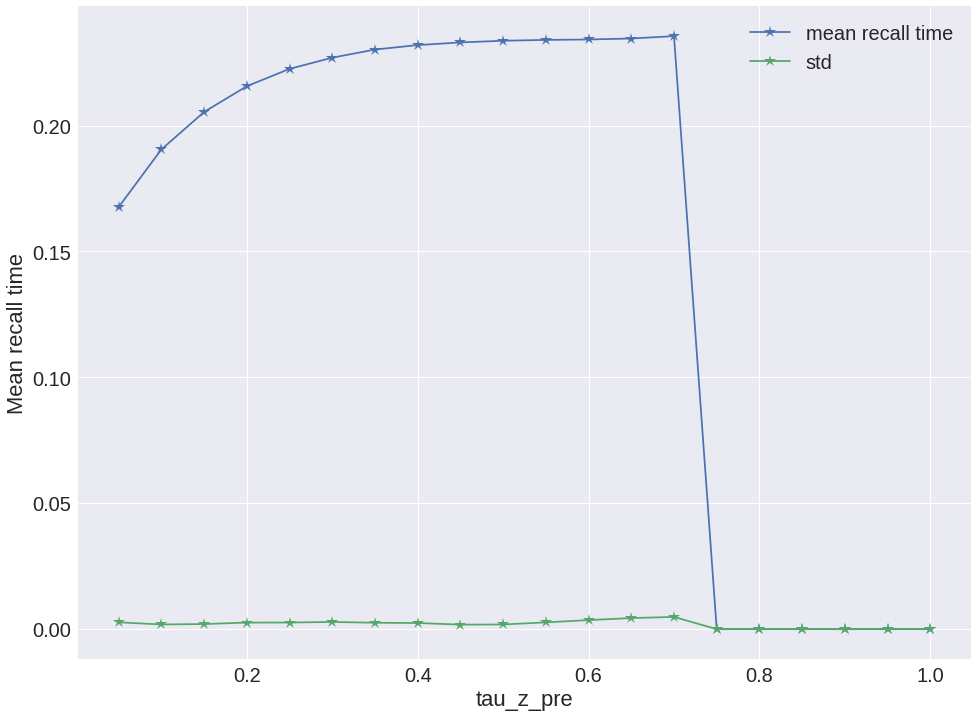

In [45]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_pre_range, mean_tau_z_pre, '*-', markersize=13, label='mean recall time')
ax.plot(tau_z_pre_range, std_tau_z_pre, '*-', markersize=13, label='std')

ax.set_xlabel('tau_z_pre')
ax.set_ylabel('Mean recall time')

ax.legend();

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(tau_z_pre_range, total_tau_z_pre, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('tau_z_pre')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(tau_z_pre_range, successes_tau_z_pre, 'o-', color='red', label='success')
axt.set_ylim([-5, 115])
axt.grid()
axt.set_ylabel('Success')



lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Tau_a

In [47]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

tau_a_range = np.arange(0.500, 10.500, 0.500)

In [48]:
mean_tau_a = []
std_tau_a = []
total_tau_a = []
successes_tau_a = []

for tau_a in tau_a_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_tau_a.append(mean)
    std_tau_a.append(std)
    total_tau_a.append(total_sequence_time)
    successes_tau_a.append(success)

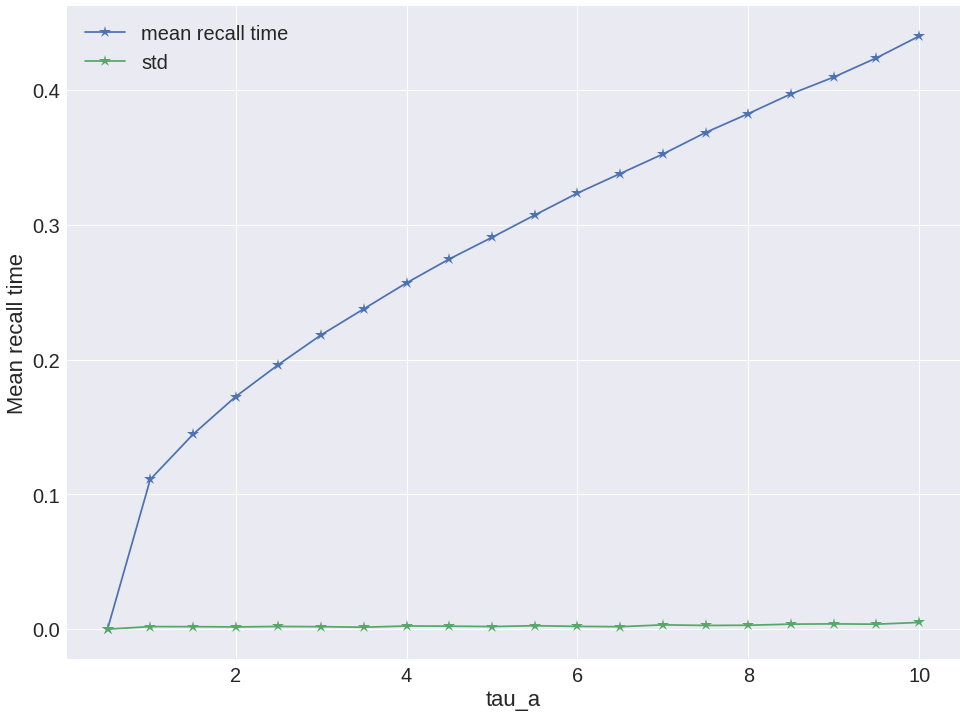

In [49]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_a_range, mean_tau_a, '*-', markersize=13, label='mean recall time')
ax.plot(tau_a_range, std_tau_a, '*-', markersize=13, label='std')

ax.set_xlabel('tau_a')
ax.set_ylabel('Mean recall time')

ax.legend();

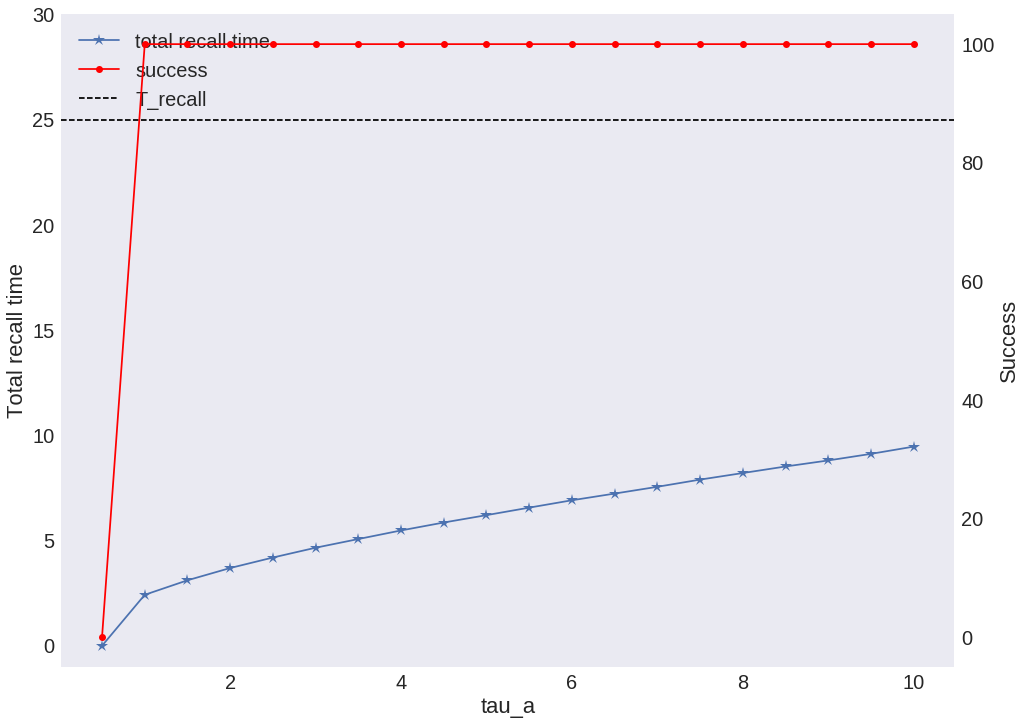

In [50]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(tau_a_range, total_tau_a, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('tau_a')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(tau_a_range, successes_tau_a, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

##### g_a

In [51]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

g_a_range = np.arange(50.0, 160.0, 10.0)

In [52]:
mean_g_a = []
std_g_a = []
total_g_a = []
successes_g_a = []

for g_a in g_a_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_g_a.append(mean)
    std_g_a.append(std)
    total_g_a.append(total_sequence_time)
    successes_g_a.append(success)

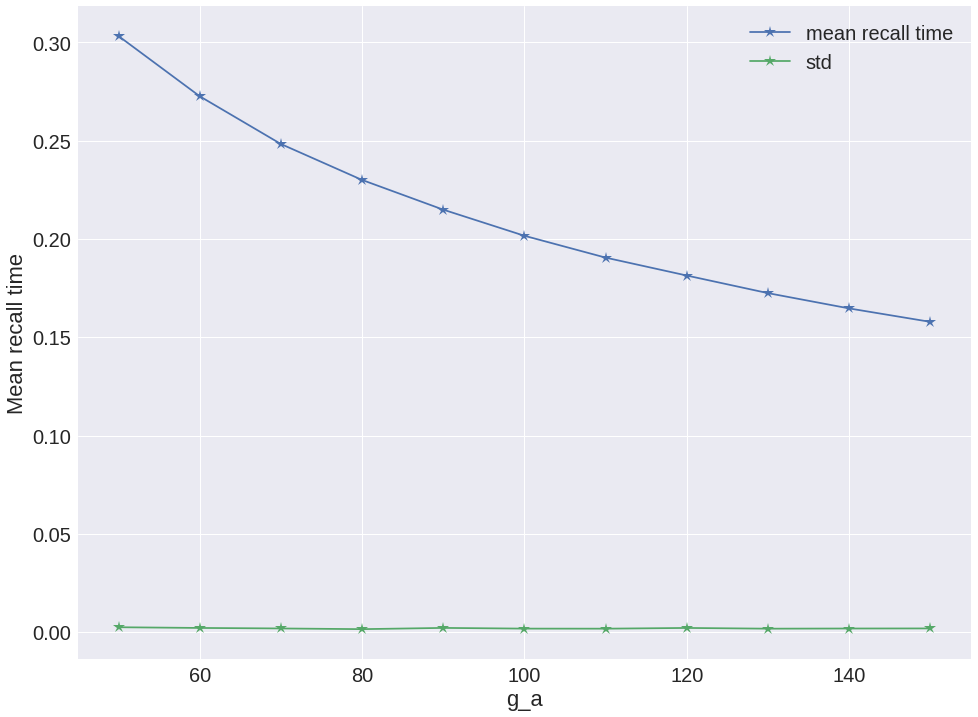

In [53]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_a_range, mean_g_a, '*-', markersize=13, label='mean recall time')
ax.plot(g_a_range, std_g_a, '*-', markersize=13, label='std')

ax.set_xlabel('g_a')
ax.set_ylabel('Mean recall time')

ax.legend();

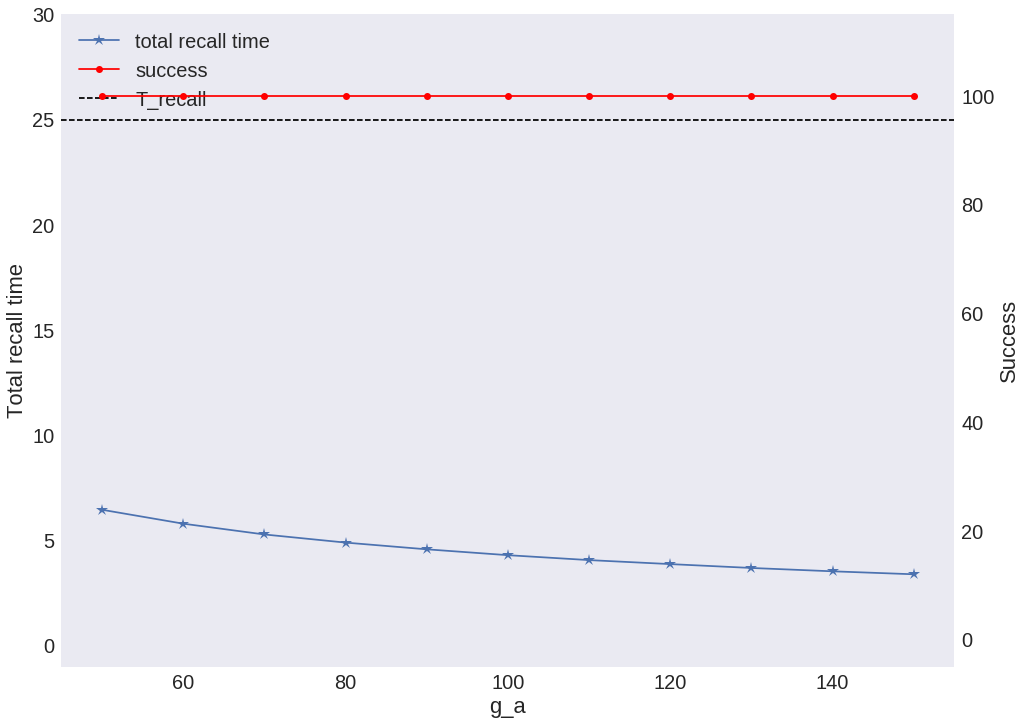

In [78]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(g_a_range, total_g_a, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('g_a')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(g_a_range, successes_g_a, 'o-', color='red', label='success')
axt.set_ylim([-5, 115])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Extension

In [55]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

extension_range = np.arange(1, 8, 1)

In [56]:
mean_extension = []
std_extension = []
total_extension = []
successes_extension = []

for extension in extension_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_extension.append(mean)
    std_extension.append(std)
    total_extension.append(total_sequence_time)
    successes_extension.append(success)

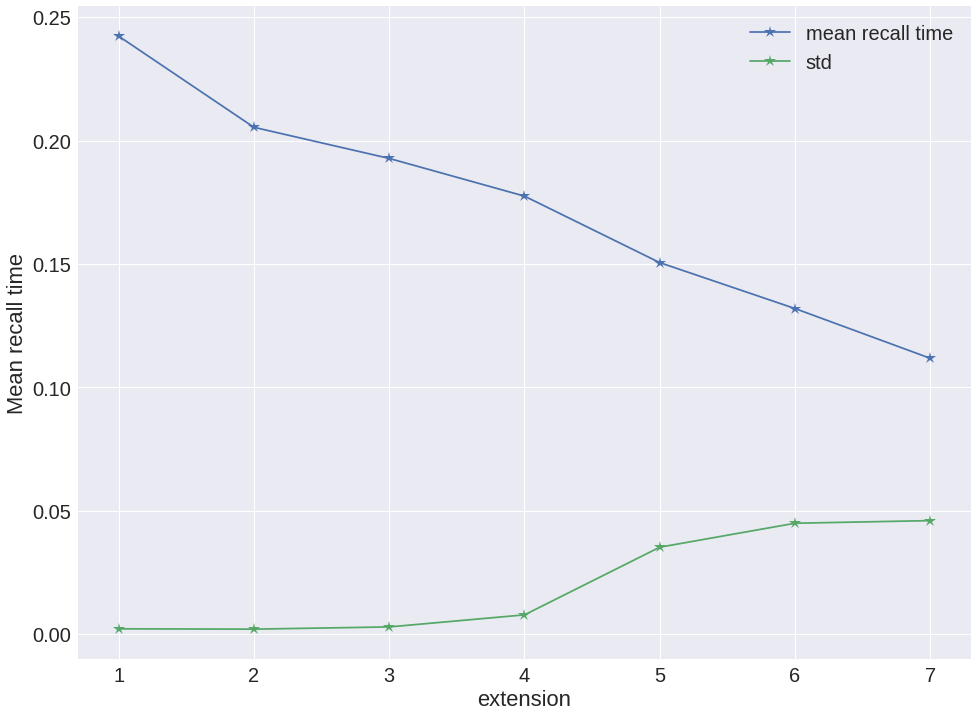

In [57]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(extension_range, mean_extension, '*-', markersize=13, label='mean recall time')
ax.plot(extension_range, std_extension, '*-', markersize=13, label='std')

ax.set_xlabel('extension')
ax.set_ylabel('Mean recall time')

ax.legend();

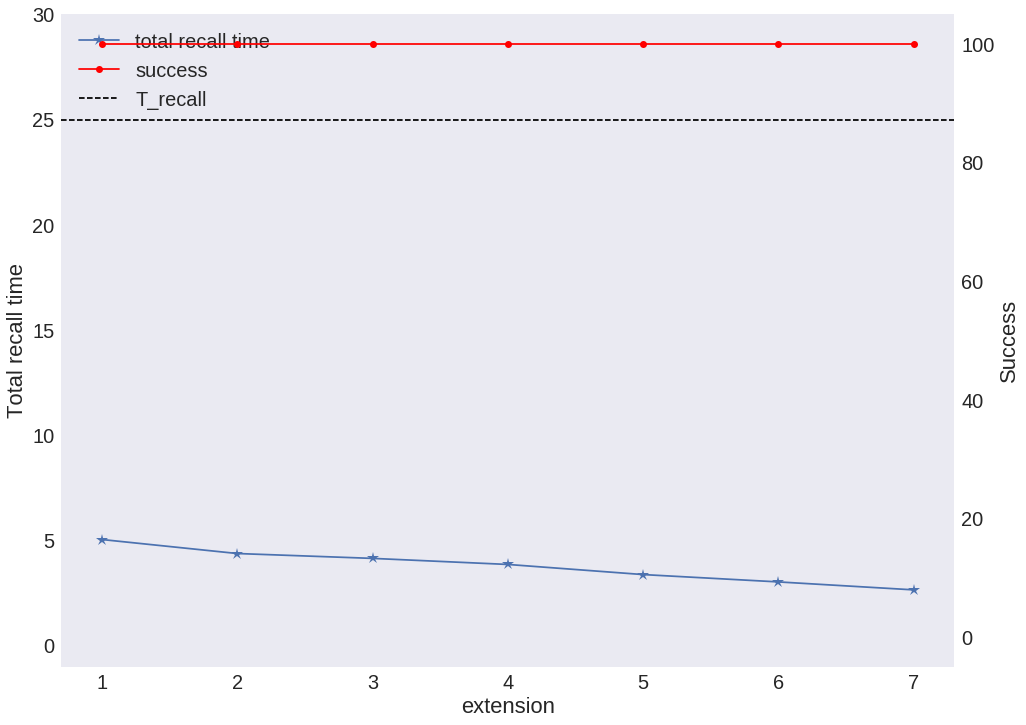

In [58]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(extension_range, total_extension, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('extension')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(extension_range, successes_extension, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Extension decay

In [59]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 4
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

extension_decay_range = np.arange(0.05, 0.30, 0.05)

In [60]:
mean_extension_decay = []
std_extension_decay = []
total_extension_decay = []
successes_extension_decay = []

for extension_decay in extension_decay_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_extension_decay.append(mean)
    std_extension_decay.append(std)
    total_extension_decay.append(total_sequence_time)
    successes_extension_decay.append(success)

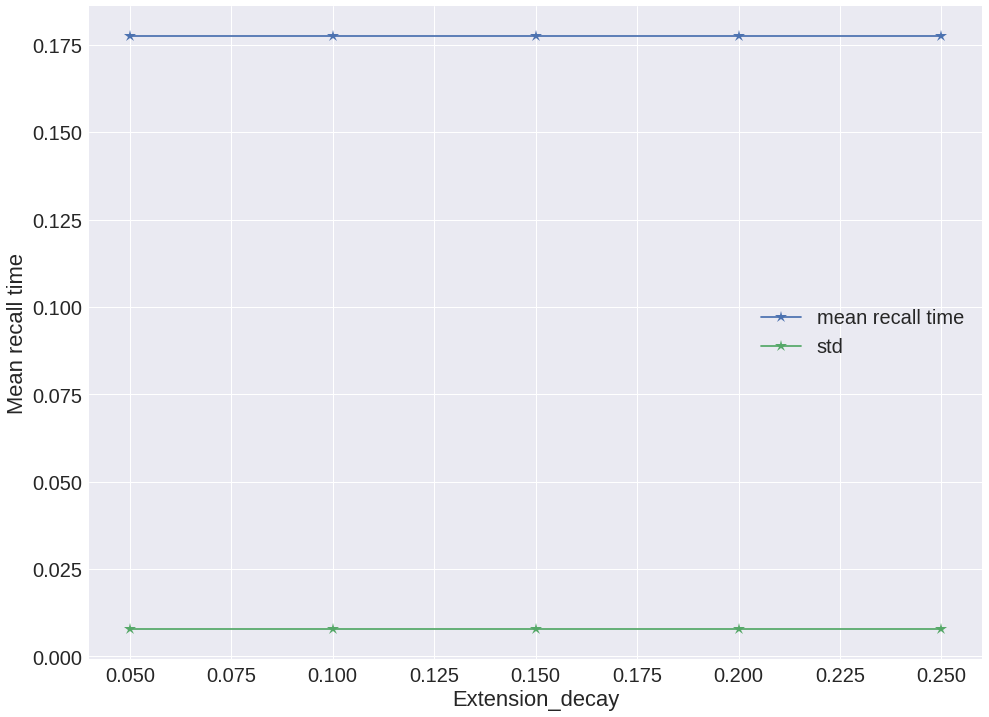

In [61]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(extension_decay_range, mean_extension_decay, '*-', markersize=13, label='mean recall time')
ax.plot(extension_decay_range, std_extension_decay, '*-', markersize=13, label='std')

ax.set_xlabel('Extension_decay')
ax.set_ylabel('Mean recall time')

ax.legend();

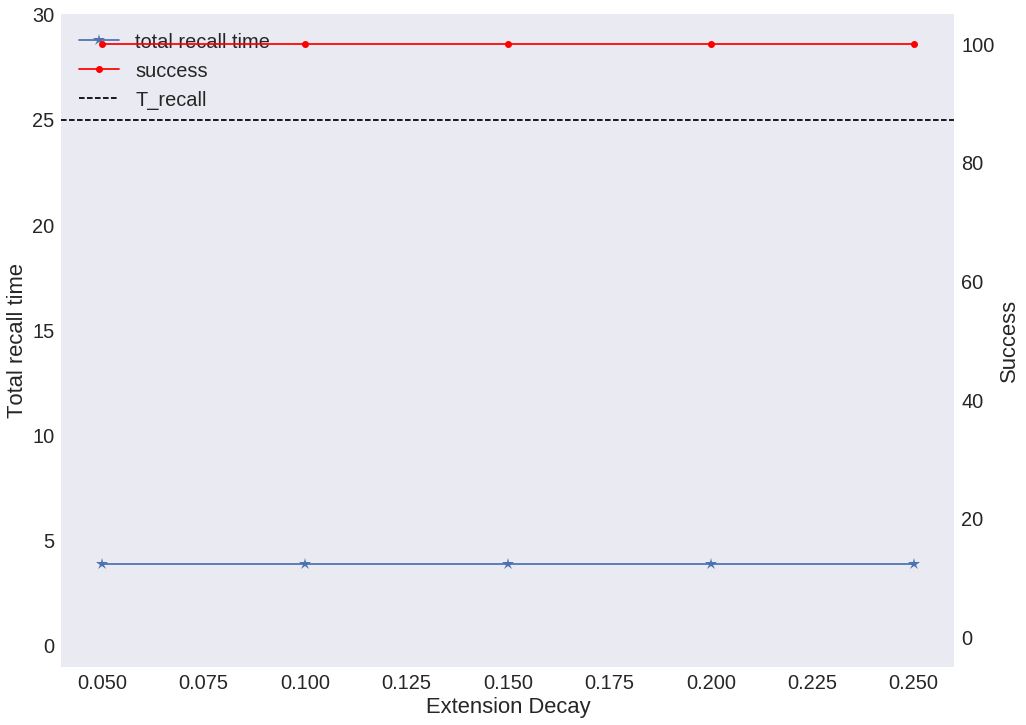

In [62]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(extension_decay_range, total_extension_decay, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('Extension Decay')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(extension_decay_range, successes_extension_decay, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### Sequence decay

In [63]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

sequence_decay_range = np.arange(0.01, 0.13, 0.01)

In [64]:
mean_sequence_decay = []
std_sequence_decay = []
total_sequence_decay = []
successes_sequence_decay = []

for sequence_decay in sequence_decay_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_sequence_decay.append(mean)
    std_sequence_decay.append(std)
    total_sequence_decay.append(total_sequence_time)
    successes_sequence_decay.append(success)

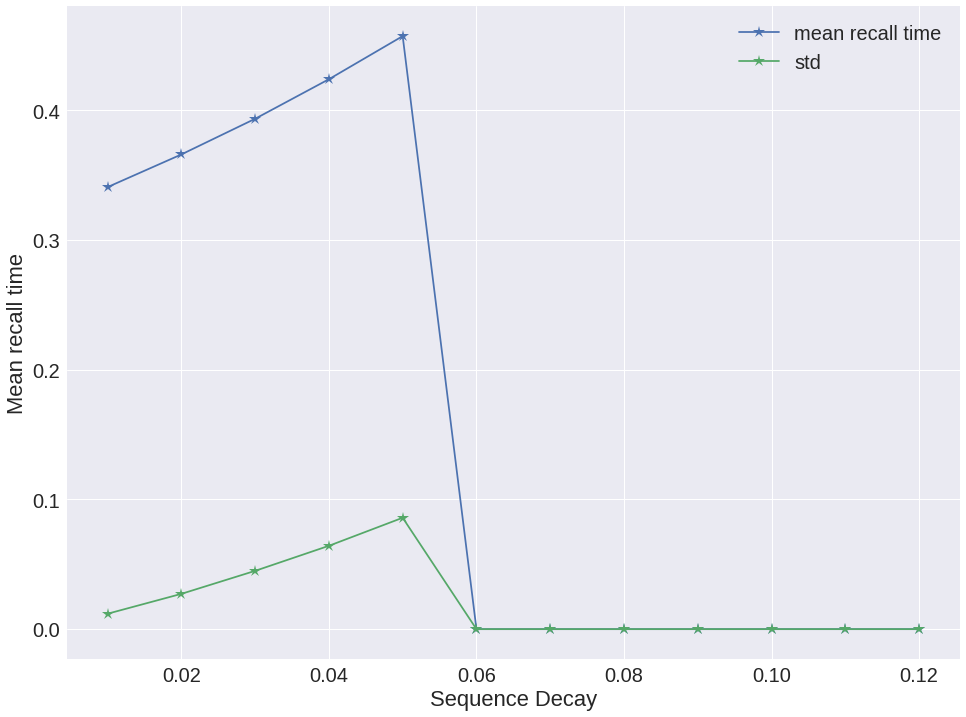

In [65]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sequence_decay_range, mean_sequence_decay, '*-', markersize=13, label='mean recall time')
ax.plot(sequence_decay_range, std_sequence_decay, '*-', markersize=13, label='std')

ax.set_xlabel('Sequence Decay')
ax.set_ylabel('Mean recall time')

ax.legend();

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(sequence_decay_range, total_sequence_decay, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('Sequence Decay')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(sequence_decay_range, successes_sequence_decay, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

##### g_w_nmda

In [68]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 1
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

g_w_range = np.logspace(-1, 1, 10)

In [69]:
mean_g_w = []
std_g_w = []
total_g_w = []
successes_g_w = []

for g_w in g_w_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_g_w.append(mean)
    std_g_w.append(std)
    total_g_w.append(total_sequence_time)
    successes_g_w.append(success)

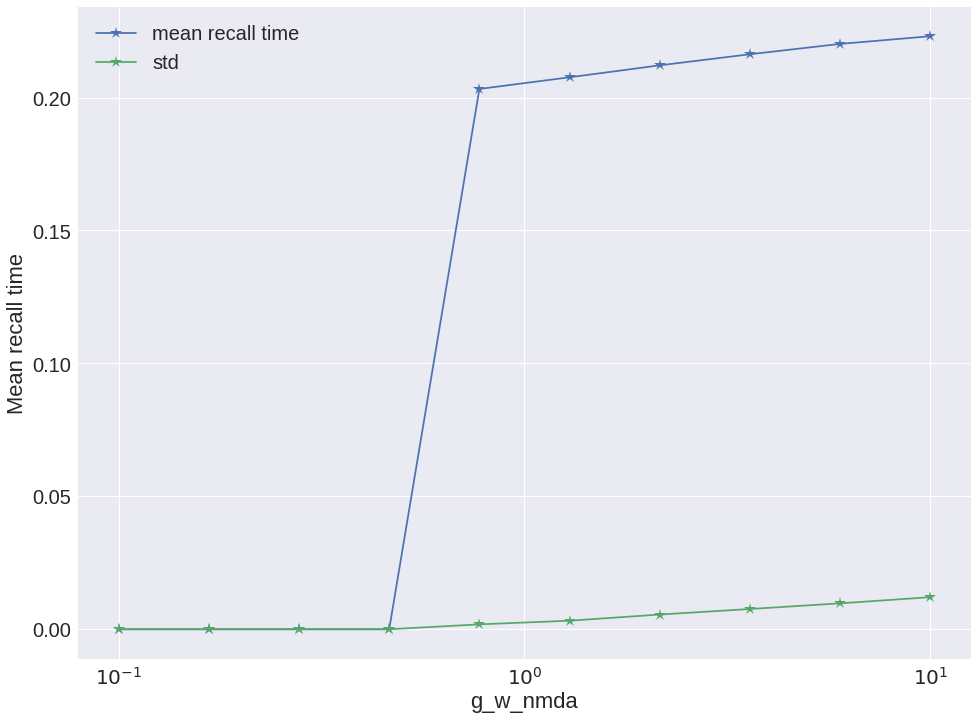

In [70]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_range, mean_g_w, '*-', markersize=13, label='mean recall time')
ax.plot(g_w_range, std_g_w, '*-', markersize=13, label='std')
ax.set_xscale('log')

ax.set_xlabel('g_w_nmda')
ax.set_ylabel('Mean recall time')

ax.legend();

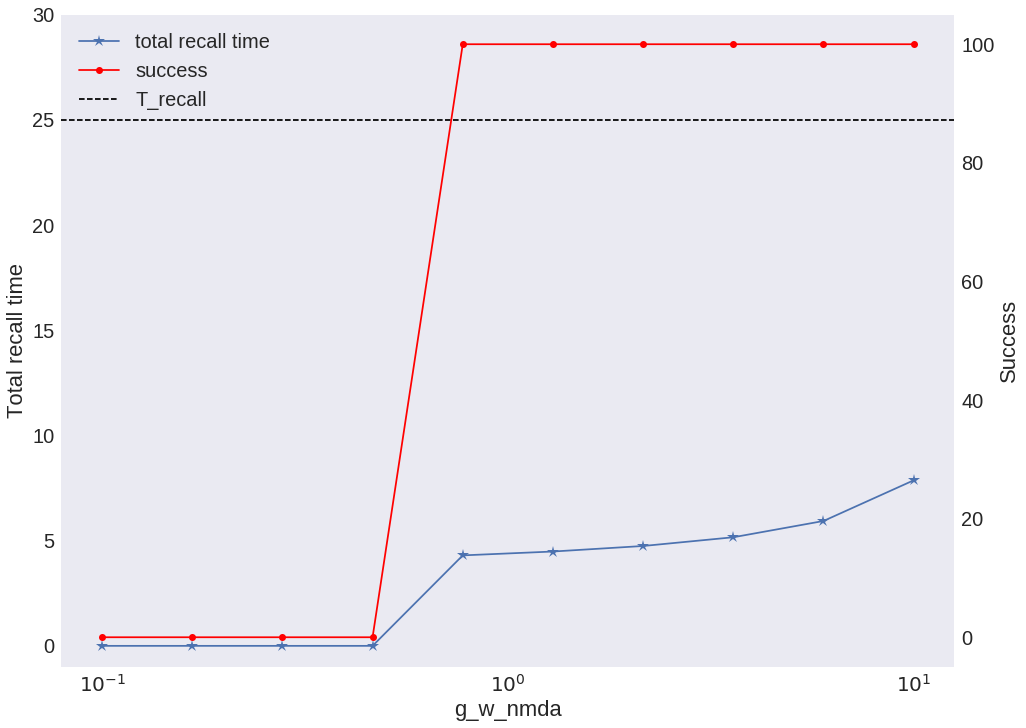

In [71]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(g_w_range, total_g_w, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xlabel('g_w_nmda')
ax.set_ylabel('Total recall time')
ax.set_xscale('log')

axt = ax.twinx()
lns2 = axt.plot(g_w_range, successes_g_w, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

#### g_n_ampa

In [74]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 20

dt = 0.001


beta = False
value = 3
inhibition = -1.0
extension = 2
decay_factor = 0.3
sequence_decay = 0.0


tau_z_pre = 0.150
g_w = 1.0
g_w_ampa = 1.0
g_a = 97.0
tau_a = 2.70

g_w_ampa_range = np.logspace(-1, 1, 10)

In [75]:
mean_g_w_ampa = []
std_g_w_ampa = []
total_g_w_ampa = []
successes_g_w_ampa = []

for g_w_ampa in g_w_ampa_range:
    sequences = [[i for i in range(n_patterns)]]
    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value, inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor, sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True, beta=beta)
    
    # Get values right
    manager.nn.tau_z_pre = tau_z_pre
    manager.nn.g_w = g_w
    manager.nn.g_w_ampa = g_w_ampa
    manager.nn.g_a = g_a
    manager.nn.tau_a = tau_a

    # Recall
    T_cue = 0.100
    T_recall = 25.0
    I_cue = sequences[0][0]
    
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=T_cue, I_cue=I_cue, 
                                   n=1, patterns_indexes=sequences[0])
    timings = calculate_timings(manager, remove=0.010)
   
    patterns = [x[0] for x in timings]
    
    # Check correct subsequence recalling
    flag = subsequence(patterns, sequences[0])
    n_min = min(len(sequences[0]), len(timings))

    if flag:
        time = [x[1] for x in timings[:n_min]]
        total_sequence_time = sum(time)
        mean = np.mean(time[1:-1])
        std = np.std(time[1:-1])
    else:
        time = 0
        total_sequence_time = 0
        mean = 0
        std = 0
    
    mean_g_w_ampa.append(mean)
    std_g_w_ampa.append(std)
    total_g_w_ampa.append(total_sequence_time)
    successes_g_w_ampa.append(success)

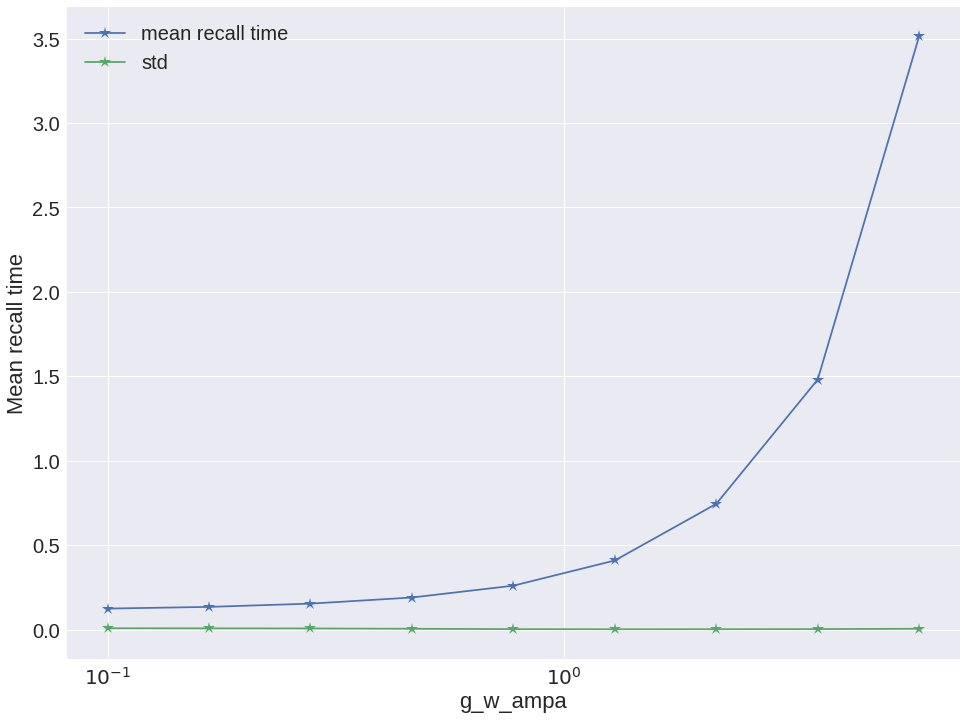

In [76]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(g_w_ampa_range, mean_g_w_ampa, '*-', markersize=13, label='mean recall time')
ax.plot(g_w_ampa_range, std_g_w_ampa, '*-', markersize=13, label='std')
ax.set_xscale('log')

ax.set_xlabel('g_w_ampa')
ax.set_ylabel('Mean recall time')

ax.legend();

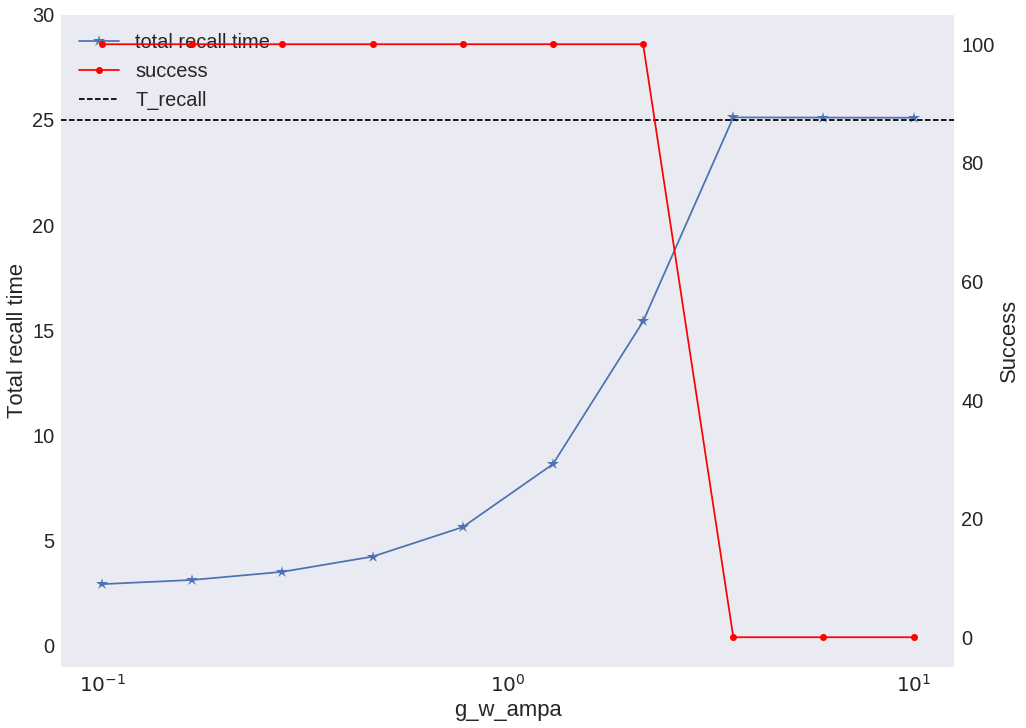

In [77]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
lns1 = ax.plot(g_w_ampa_range, total_g_w_ampa, '*-', markersize=13, label='total recall time')
ax.set_ylim([-1, T_recall + 5])
lns3 = ax.axhline(T_recall, ls='--', color='black', label='T_recall')

ax.grid()
ax.set_xscale('log')

ax.set_xlabel('g_w_ampa')
ax.set_ylabel('Total recall time')


axt = ax.twinx()
lns2 = axt.plot(g_w_ampa_range, successes_g_w_ampa, 'o-', color='red', label='success')
axt.set_ylim([-5, 105])
axt.grid()
axt.set_ylabel('Success')
axt.set_xscale('log')


lns = lns1+lns2 + [lns3]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2);

## Normal training method

#### Git machinery

In [ ]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])